In [1]:
%pip install pandas pyarrow numpy geopandas


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\noten\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# Replace 'your_file.parquet' with the path to your Parquet file
df = pd.read_parquet('yellow_tripdata_2024-01.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [10]:
df['trip_distance'].describe()

count    2.964624e+06
mean     3.652169e+00
std      2.254626e+02
min      0.000000e+00
25%      1.000000e+00
50%      1.680000e+00
75%      3.110000e+00
max      3.127223e+05
Name: trip_distance, dtype: float64

Part of Taxi Zone ID's:
- PULocationID - Pick Up Location ID 
- DOLocationID - Drop Off Location ID

In [3]:
df.columns.to_list()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

In [4]:
zone_lookup = pd.read_csv('taxi_zone_lookup.csv')
zone_lookup.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [5]:
import numpy as np
import math
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely
from shapely.geometry import Polygon

zipfile = "zip://taxi_zones.zip"
table = gpd.read_file(zipfile)
table.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


dtype: <class 'shapely.geometry.polygon.Polygon'>
Exteriors: LINEARRING (933100.9183527103 192536.08569720192, 933091.0114800561 192572.17526147654, 933088.5848363293 192604.9701013019, 933121.5604029286 192857.3815947791, 933149.268070866 192978.64529974, 933222.303599316 193293.27321561542, 933252.5816221443 193450.60036714407, 933297.7228000937 193555.43279791903, 933330.5712151835 193748.8233831425, 933350.6320882778 193794.68697530977, 933355.7056937596 193834.0240346551, 933365.7979032588 193886.46647872418, 933431.7392324115 194391.29051182547, 933465.0379729305 194801.09275264665, 933463.4338186719 195227.36293221635, 933471.1052103372 195315.8792411817, 933483.7536692393 195397.82719968376, 933511.4361339996 195509.2545406304, 933554.0907006934 195620.65066105462, 933609.1944352826 195718.9049942211, 933669.2474974946 195797.47528837126, 933731.7750771455 195866.2036557206, 933779.2756322531 195908.73159505273, 933841.7617821106 195957.78647365439, 933906.7226421668 195996.999

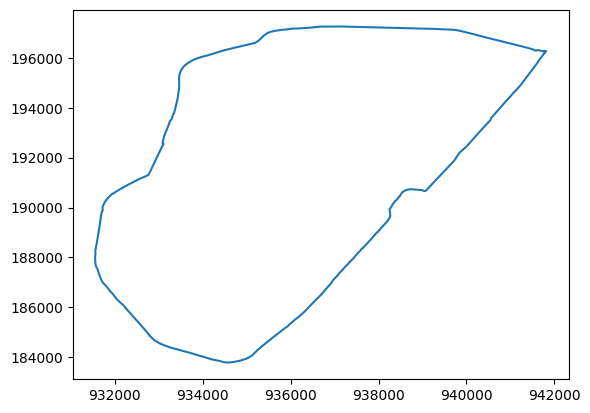

In [6]:
# https://shapely.readthedocs.io/en/2.0.6/reference/shapely.Polygon.html
geo = table['geometry']
polygon = geo[0]

print("dtype:", type(polygon))
print("Exteriors:", polygon.exterior)
print("Interiors:", polygon.interiors)
print("Bounds:", polygon.bounds)

x, y = polygon.exterior.xy
plt.plot(x,y)